##Load Data

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.




```
# Item_Identifier ,object  : Unique product ID
# Item_Weight ,float64: Weight of product
# Item_Fat_Content ,DONE : Whether the product is low fat or not
# Item_Visibility, float64: % of total display area in store allocated to this product
# Item_Type, object : Category to which product belongs
# Item_MRP ,float64: Maximum Retail Price (list price) of product
# Outlet_Identifier ,object : Unique store ID
# Outlet_Establishment_Year ,int64  : Year in which store was established
# Outlet_Size ,object : Size of the store
# Outlet_Location_Type ,object : Type of city in which store is located
# Outlet_Type ,object : Grocery store or some sort of supermarket
# Item_Outlet_Sales ,float64: Sales of product in particular store. This is the outcome variable to be predicted.
# print(df_train['Outlet_Location_Type'].value_counts())
# print(df_train['Outlet_Identifier'].value_counts())
# print(df_train.columns)
```



In [142]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [143]:
df_train=pd.read_csv('/content/drive/MyDrive/Train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Test.csv')

# EDA

## Head, Shape, Info, Description 

In [144]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [145]:
print(df_train.info())
print('_________________________________')
print(df_train.describe())
print('_________________________________')
print(df_train.columns)
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
_________________________________
      

## Clean the data 


### Handling missing value

In [146]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [150]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [147]:
#Get the most repeated value in Outlet_Size col to fill null
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [151]:
df_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [152]:
df_test['Outlet_Size'].value_counts()


Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [153]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna('Medium')
df_test['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_test['Outlet_Size']=df_train['Outlet_Size'].fillna('Medium')

### Handling Duplicate records

In [149]:
df_train.drop_duplicates(keep=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [154]:
df_test.drop_duplicates(keep=False)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,9.300000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,5.920000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,17.500000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,19.200000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,8.930000,Regular,0.118599,Dairy,234.2300,OUT027,1985,High,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,15.100000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Medium,Tier 1,Supermarket Type1
5677,FDD47,12.150000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,High,Tier 3,Supermarket Type2
5678,NCO17,10.695000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,12.857645,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


## Handling Outlier

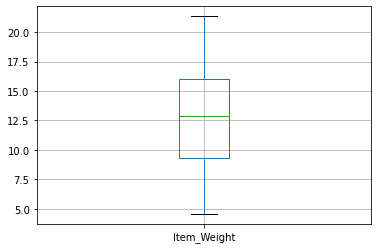

In [126]:
df_train.boxplot(column=['Item_Weight'])
plt.show()
#No outliers

## Univariate Analysis

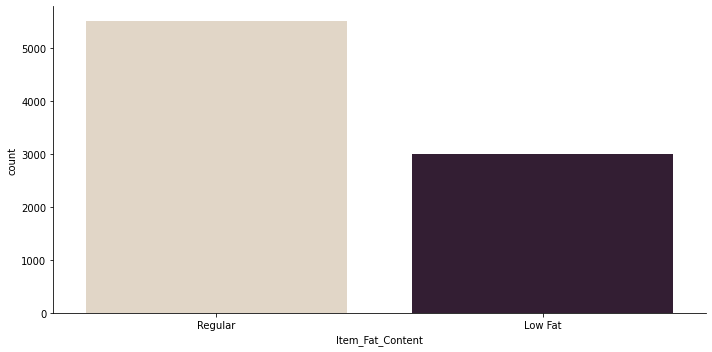

In [132]:
g=sns.catplot(x="Item_Fat_Content", kind="count", palette="ch:.25", data=df_train,height=5, aspect=2)
g.set_xticklabels({'Regular':1,'Low Fat':0})

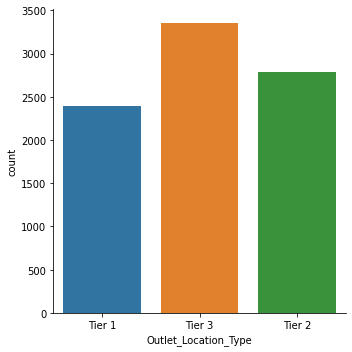

In [ ]:
sns.catplot(x="Outlet_Location_Type", kind="count", data=df_train)
# TIER 1 SUPPLIERS:directly conduct business with, including contracted manufacturing facilities or production partners. 
# Take, for example, a company selling apparel: The factory that assembles that company’s cotton t-shirts is a Tier 1 supplier.  
# TIER 2 SUPPLIERS as the sources where your Tier 1 suppliers get their materials. Again,
# the apparel company example: That t-shirt factory receives its materials from a fabric mill. That mill is a Tier 2 supplier to the apparel company.    
# TIER 3 SUPPLIERS: partners are one step further removed from a final product and typically work in raw materials.
#  Once again, following our apparel company example: The Tier 3 supplier here is the farm that sells cotton to the fabric mill. 

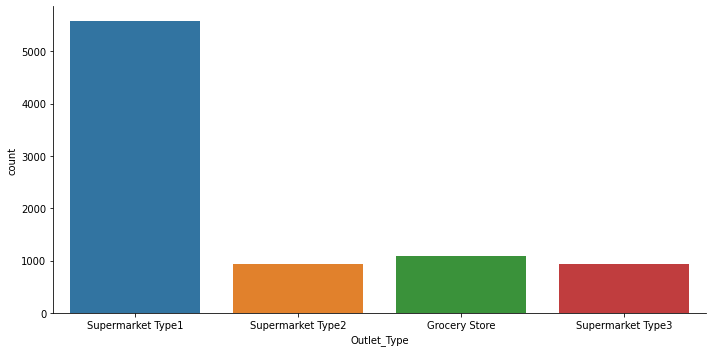

In [158]:
sns.catplot(x="Outlet_Type", kind="count", data=df_train ,height=5, aspect=2)


stores with medium size has the highest sales


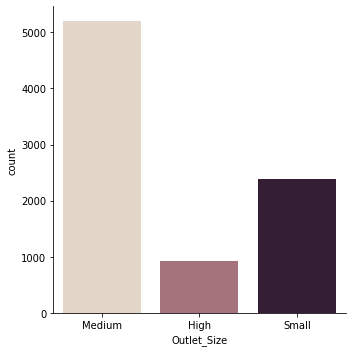

In [105]:
sns.catplot(x="Outlet_Size", kind="count", palette="ch:.25", data=df_train)

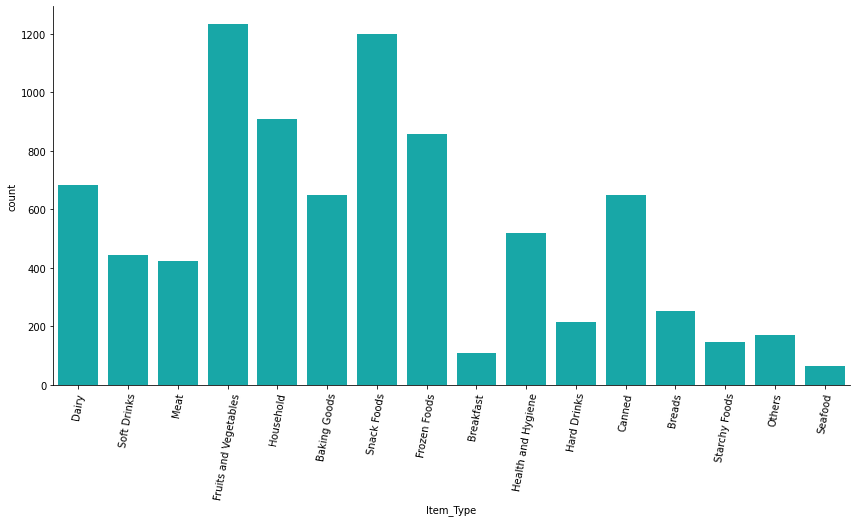

In [166]:
graph=sns.catplot(x="Item_Type",kind='count',data=df_train, color="c", height=6, aspect=2)
graph.set_xticklabels(rotation=80)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


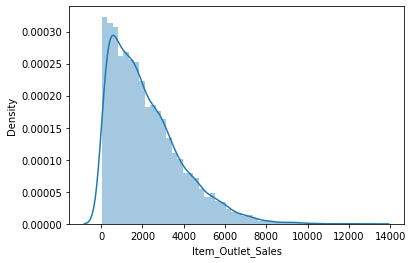

In [160]:
sns.distplot(df_train['Item_Outlet_Sales'])
#right skewed 

## Bivariate Analysis


Markets dealing with Tier-3 type has the highest sales


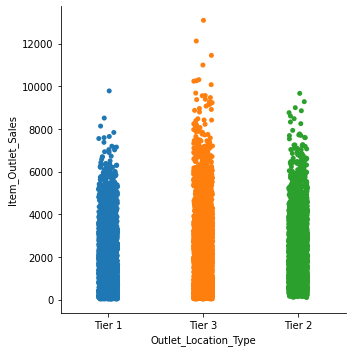

In [168]:
sns.catplot(x="Outlet_Location_Type",y='Item_Outlet_Sales', data=df_train)
print('Markets dealing with Tier-3 type has the highest sales') 

Outlets with 'Supermarket Type3' type has the highest sales


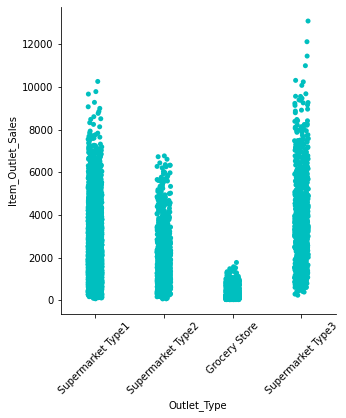

In [171]:
graph=sns.catplot(x="Outlet_Type",y='Item_Outlet_Sales', data=df_train, color="c")
graph.set_xticklabels(rotation=45)
print("Outlets with 'Supermarket Type3' type has the highest sales")

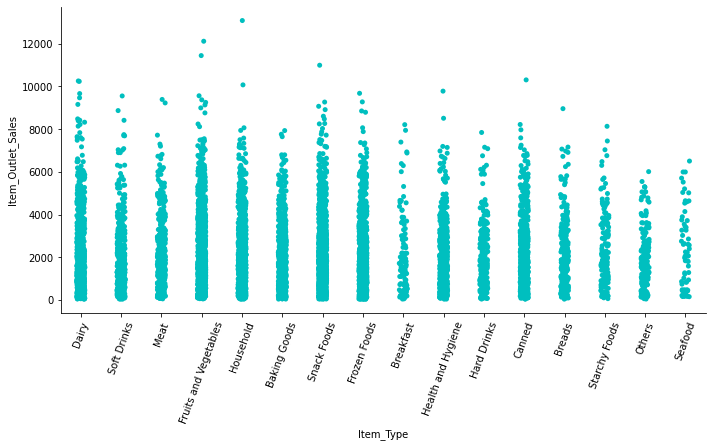

In [172]:
graph=sns.catplot(x="Item_Type",y='Item_Outlet_Sales',data=df_train, color="c", height=5, aspect=2)
graph.set_xticklabels(rotation=70)


Household has the highest sales 

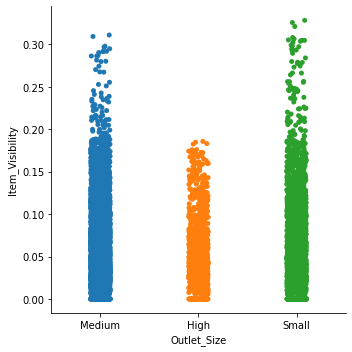

In [135]:
sns.catplot(x="Outlet_Size",y="Item_Visibility", data=df_train)

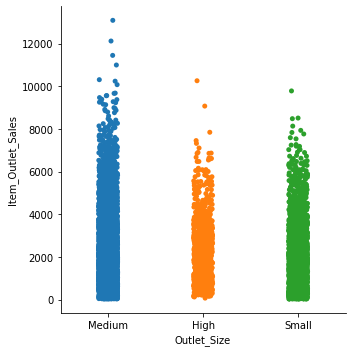

In [137]:
sns.catplot(x="Outlet_Size",y="Item_Outlet_Sales", data=df_train)

After 0.2 persent for item-visibility sales decrease


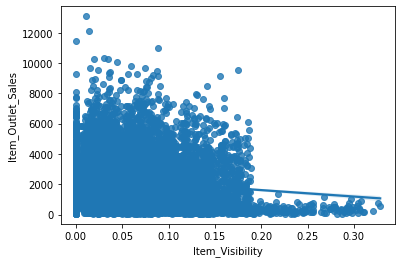

In [136]:
sns.regplot(x="Item_Visibility",y="Item_Outlet_Sales", data=df_train)
print('After 0.2 persent for item-visibility sales decrease')

After the last 3 graphs we've seen we can say that if the store in medium size and its item visibility doesn't exeed 0.2, the sales will be more 

## Encoding Categorical Variables

In [176]:
Item_Fat_Content=np.array(df_train["Item_Fat_Content"].unique())
Outlet_Location_Type=np.array(df_train["Outlet_Location_Type"].unique())
Outlet_Identifier=np.array(df_train["Outlet_Identifier"].unique())
Outlet_Type=np.array(df_train["Outlet_Type"].unique())
Outlet_Size=np.array(df_train["Outlet_Size"].unique())
Item_Type=np.array(df_train["Item_Type"].unique())
Item_Identifier=np.array(df_train["Item_Identifier"].unique())


print(Item_Fat_Content)
print(Outlet_Location_Type)
print(Outlet_Identifier)
print(Outlet_Type)
print(Outlet_Size)
print(Item_Type)
print(Item_Identifier)
objcets=[Outlet_Location_Type,Outlet_Identifier,Outlet_Type,Outlet_Size,Item_Type,Item_Identifier]

[0 1]
['Tier 1' 'Tier 3' 'Tier 2']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Medium' 'High' 'Small']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


In [177]:
def return_dict_encoder(list_to_encode):
  encoded_dict=dict()
  i=0
  for element in list_to_encode:
    encoded_dict[element]=i
    i+=1
  return encoded_dict

In [180]:
encode_Outlet_Location_Type=return_dict_encoder(Outlet_Location_Type)
encode_Outlet_Identifier=return_dict_encoder(Outlet_Identifier)
encode_Outlet_Type=return_dict_encoder(Outlet_Type)
encode_Outlet_Size=return_dict_encoder(Outlet_Size)
encode_Item_Type=return_dict_encoder(Item_Type)
encode_Item_Identifier=return_dict_encoder(Item_Identifier)

In [174]:
dict_Item_Fat_Content={'Item_Fat_Content':{'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0}}
df_train=df_train.replace(dict_Item_Fat_Content)
df_test=df_test.replace(dict_Item_Fat_Content)

In [184]:
df_train['Outlet_Location_Type']=df_train['Outlet_Location_Type'].replace(encode_Outlet_Location_Type)
df_test['Outlet_Location_Type']=df_test['Outlet_Location_Type'].replace(encode_Outlet_Location_Type)
##
df_train['Outlet_Identifier']=df_train['Outlet_Identifier'].replace(encode_Outlet_Identifier)
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace(encode_Outlet_Identifier)
##
df_train['Outlet_Type']=df_train['Outlet_Type'].replace(encode_Outlet_Type)
df_test['Outlet_Type']=df_test['Outlet_Type'].replace(encode_Outlet_Type)
##
df_train['Outlet_Size']=df_train['Outlet_Size'].replace(encode_Outlet_Size)
df_test['Outlet_Size']=df_test['Outlet_Size'].replace(encode_Outlet_Size)
##
df_train['Item_Type']=df_train['Item_Type'].replace(encode_Item_Type)
df_test['Item_Type']=df_test['Item_Type'].replace(encode_Item_Type)
##
df_train['Item_Identifier']=df_train['Item_Identifier'].replace(encode_Item_Identifier)
df_test['Item_Identifier']=df_test['Item_Identifier'].replace(encode_Item_Identifier)

In [186]:
#Change type to category
df_train.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# df_train["Item_Type"] = df_train["Item_Type"].astype('category')
# df_train["Outlet_Identifier"] = df_train["Outlet_Identifier"].astype('category')
# df_train["Outlet_Size"] = df_train["Outlet_Size"].astype('category')
# df_train["Outlet_Location_Type"] = df_train["Outlet_Location_Type"].astype('category')
# df_train["Outlet_Type"] = df_train["Outlet_Type"].astype('category')
# df_train["Outlet_Type"] 

# df_test["Outlet_Type"]= df_test["Outlet_Type"].cat.codes
# df_train["Outlet_Type"]= df_train["Outlet_Type"].cat.codes
# df_train["Outlet_Type"]

## Splitting the Data

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [198]:
X=df_train.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
y=df_train['Item_Outlet_Sales']
x_test=df_test.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'],axis=1)


In [199]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Applying Linear Regression Model

In [200]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
predicted_Item_Outlet_Sales=lr.predict(X_test)

In [202]:
mse=MSE(y_test,predicted_Item_Outlet_Sales)
print("MSE=",mse )
score=lr.score(X_test,y_test)
print(score)

MSE= 1843169.6309508083
0.3642245955416906


In [207]:
predict=lr.predict(x_test)
print(type(predict))
df_test['Item_Outlet_Sales']=pd.DataFrame(predict)

<class 'numpy.ndarray'>


In [209]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1361,9.30,0,0.007565,6,107.8622,0,1999,0,0,0,1779.497358
1,1536,5.92,1,0.038428,0,87.3198,6,2007,0,2,0,1706.006299
2,180,17.50,0,0.099575,14,241.7538,2,1998,0,1,2,3721.827952
3,1435,19.20,0,0.015388,6,155.0340,6,2007,0,2,0,2809.688044
4,235,8.93,1,0.118599,0,234.2300,4,1985,1,1,3,3475.140223


## Applying Decision Tree (Randonforst Regression) Model

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [210]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
rfr = RandomForestRegressor()

RandomForestRegressor()

In [211]:
rfr.fit(X_train, y_train)


RandomForestRegressor()

In [213]:
rfr_predicted_Item_Outlet_Sales=rfr.predict(X_test)
mse=MSE(y_test,rfr_predicted_Item_Outlet_Sales)
print("MSE=",mse)
score=rfr.score(X_test,y_test)
print(score)

MSE= 1286691.2741395382
0.5561739671204062


In [214]:
predict=rfr.predict(x_test)
# print(type(predict))
df_test['RF_Item_Outlet_Sales']=pd.DataFrame(predict)

In [215]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,RF_Item_Outlet_Sales
0,1361,9.30,0,0.007565,6,107.8622,0,1999,0,0,0,1779.497358,1571.734086
1,1536,5.92,1,0.038428,0,87.3198,6,2007,0,2,0,1706.006299,1329.216436
2,180,17.50,0,0.099575,14,241.7538,2,1998,0,1,2,3721.827952,620.698708
3,1435,19.20,0,0.015388,6,155.0340,6,2007,0,2,0,2809.688044,2763.975488
4,235,8.93,1,0.118599,0,234.2300,4,1985,1,1,3,3475.140223,5235.611512


In [227]:
from sklearn.ensemble import AdaBoostRegressor
from numpy import loadtxt
from sklearn.metrics import accuracy_score


In [228]:
abr=AdaBoostRegressor()
abr.fit(X_train, y_train)

AdaBoostRegressor()

In [229]:
abr_predicted_Item_Outlet_Sales=abr.predict(X_test)

In [232]:
abr_predicted_Item_Outlet_Sales=abr.predict(X_test)
mse=MSE(y_test,abr_predicted_Item_Outlet_Sales)
print("MSE=",mse)
score=abr.score(X_test,y_test)
print(score)

MSE= 1522483.976963705
0.4748405952543452


In [224]:
predict=abr.predict(x_test)
# print(type(predict))
df_test['Abr_Item_Outlet_Sales']=pd.DataFrame(predict)

In [225]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,RF_Item_Outlet_Sales,Abr_Item_Outlet_Sales
0,1361,9.30,0,0.007565,6,107.8622,0,1999,0,0,0,1779.497358,1571.734086,1561.334026
1,1536,5.92,1,0.038428,0,87.3198,6,2007,0,2,0,1706.006299,1329.216436,1427.170432
2,180,17.50,0,0.099575,14,241.7538,2,1998,0,1,2,3721.827952,620.698708,1406.341611
3,1435,19.20,0,0.015388,6,155.0340,6,2007,0,2,0,2809.688044,2763.975488,3120.593724
4,235,8.93,1,0.118599,0,234.2300,4,1985,1,1,3,3475.140223,5235.611512,5714.561400


## Conclusion 



Decision Tree model is the best fit for the data with the least MSE and highest score between the three models